In [1]:
import scipy
from numpy.random import normal
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
import matplotlib

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', size=12) 
%config InlineBackend.figure_format = 'svg'

In [2]:
np.random.seed(123)
noise = np.random.normal(0,.5,20)

fun = []
for i in np.linspace(0,4*3.14,20):
    fun.append(5.0+np.sin(i))
fun = np.array(fun)

x = np.array(range(0,20))

data = noise+fun

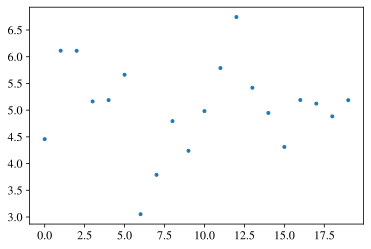

In [3]:
plt.plot(noise + fun,'.')

In [9]:
x.shape

(20,)

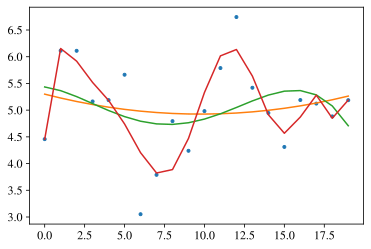

In [26]:
m0 = np.polyfit(x,data,2)
m1 = np.polyfit(x,data,4)
m2 = np.polyfit(x,data,10)

plt.plot(x,data,'.')
plt.plot(x,np.polyval(m0,x))
plt.plot(x,np.polyval(m1,x))
plt.plot(x,np.polyval(m2,x))

plt.show()



In [24]:
print(chisquare(data,np.polyval(m0,x))[0])
print(chisquare(data,np.polyval(m1,x))[0])
print(chisquare(data,np.polyval(m2,x))[0])

2.4602874130275865
1.4260153141912923
0.8883698080385686


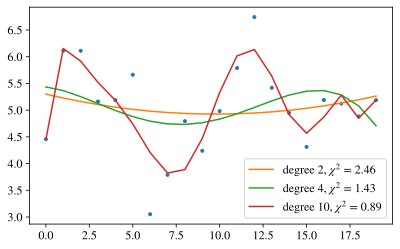

In [27]:
fig = plt.figure(figsize=(6.52437527778,4))
gs = plt.GridSpec(nrows=1, ncols=1,hspace=.5,wspace=.3)

ax = fig.add_subplot(gs[0,0])

ax.plot(data,'.')
ax.plot(np.polyval(m0,x),label='degree 2, $\chi^2$ = 2.46')
ax.plot(np.polyval(m1,x),label='degree 4, $\chi^2$ = 1.43')
ax.plot(np.polyval(m2,x),label='degree 10, $\chi^2$ = 0.89')

ax.legend()
plt.savefig('overfit_underfit.pdf')  